# this is the actual production function
`create world`
I'm a big fan of rouge-like games and RPGs. I'm also a big fan of data science tools for Python. This is my attempt to have it all. 

In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append('../')

import lib.create_world as c
import lib.drawMaps as draw

`timeit` functions to examin the runtime of each component. 

In [2]:
%%timeit
geo_world = c.the_first_age({})

2.06 s ± 22.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
geo_world = c.the_first_age({})

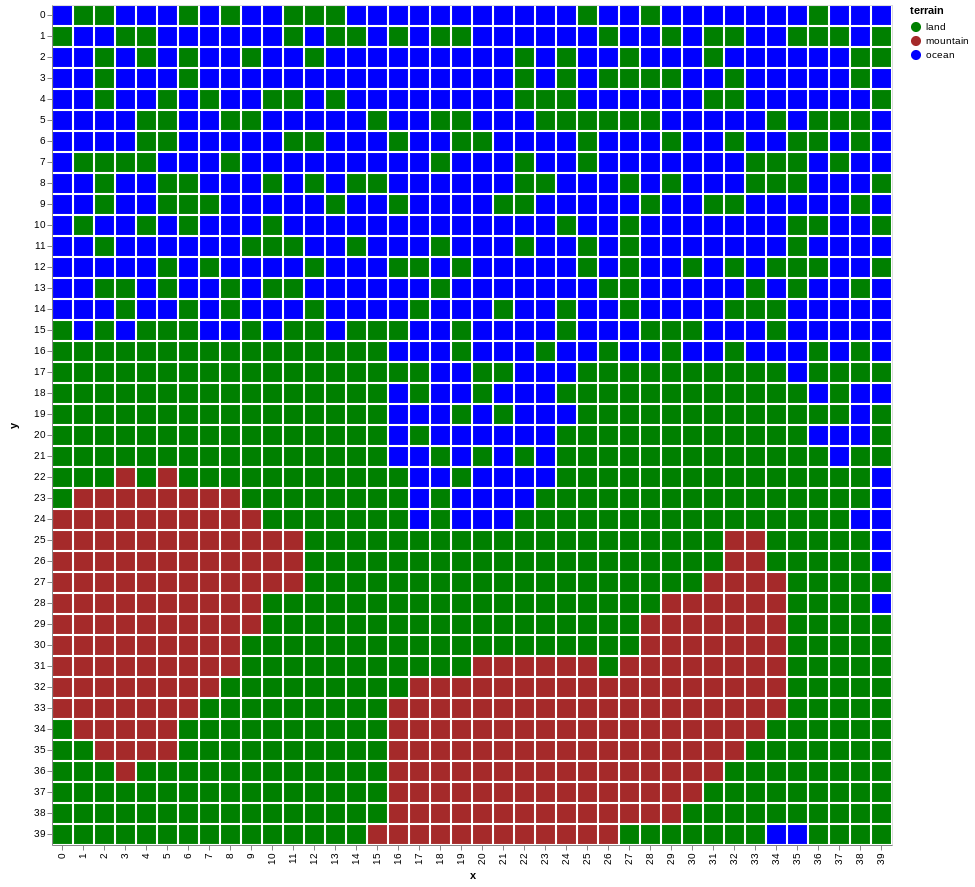

In [4]:
draw.drawTerrainTypes(geo_world.grid_elevation,geo_world.landscape)

In [5]:
%%timeit
wa = [geo_world.df_features.loc[m].to_dict() for m in geo_world.df_features.index]
dim_1 = np.unique(geo_world.df_features['x']) 
dim_1 = np.unique(geo_world.df_features['y']) 

366 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
wa = [geo_world.df_features.loc[m].to_dict() for m in geo_world.df_features.index]
dim_1 = np.unique(geo_world.df_features['x']) 
dim_1 = np.unique(geo_world.df_features['y']) 
wa

[{'y': 0,
  'rainfall': -1.0,
  'x': 0,
  'key': '0:0',
  'elevation': -1.0,
  'terrain': 'ocean'},
 {'y': 0,
  'rainfall': 1.0,
  'x': 1,
  'key': '1:0',
  'elevation': 1.0,
  'terrain': 'land'},
 {'y': 0,
  'rainfall': 1.0,
  'x': 2,
  'key': '2:0',
  'elevation': 1.0,
  'terrain': 'land'},
 {'y': 0,
  'rainfall': 0.0,
  'x': 3,
  'key': '3:0',
  'elevation': 0.0,
  'terrain': 'ocean'},
 {'y': 0,
  'rainfall': -1.0,
  'x': 4,
  'key': '4:0',
  'elevation': -1.0,
  'terrain': 'ocean'},
 {'y': 0,
  'rainfall': -1.0,
  'x': 5,
  'key': '5:0',
  'elevation': -1.0,
  'terrain': 'ocean'},
 {'y': 0,
  'rainfall': 1.0,
  'x': 6,
  'key': '6:0',
  'elevation': 1.0,
  'terrain': 'land'},
 {'y': 0,
  'rainfall': 0.0,
  'x': 7,
  'key': '7:0',
  'elevation': 0.0,
  'terrain': 'ocean'},
 {'y': 0,
  'rainfall': 2.0,
  'x': 8,
  'key': '8:0',
  'elevation': 2.0,
  'terrain': 'land'},
 {'y': 0,
  'rainfall': -1.0,
  'x': 9,
  'key': '9:0',
  'elevation': -1.0,
  'terrain': 'ocean'},
 {'y': 0,
  'rai

In [7]:
m = geo_world.df_features.index[1]
geo_world.df_features.loc[m].to_dict()

{'y': 0,
 'rainfall': 1.0,
 'x': 1,
 'key': '1:0',
 'elevation': 1.0,
 'terrain': 'land'}